<a href="https://colab.research.google.com/github/Eli-Grossman/Eli-Grossman.github.io/blob/master/VIIRS_Data_Subset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 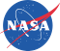 **NASA FIRMS - Subsetting by Shapefile (.shp) or Polygon**


This learning tutorial will show how to subset FIRMS data by a shapefile or  generated polygon. We will cover:

- How to import the data
- What Shapefiles should contain
- How to get the data ready to be manipulated
- How to subset data on a shapefile
- How to subset data on a [WKT](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry) (Well Known Text) Polygon string
- Saving the resulting data to a CSV, Shapefile, or KML

**Programming language:** Python

**Libraries:** [pandas](https://pandas.pydata.org), [geopandas](https://geopandas.org), [shapely](https://shapely.readthedocs.io/en/stable/), [matplotlib](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)



---

**LEVEL:** Intermediate



---


---
## Finding Shapefiles
---

In this module, we will download a sample VIIRS SNPP dataset (~6MB) from **July 12th 2023** with time range from **0:00 to 19:50** **GMT** (7:50 pm Eastern). To better understand the sample dataset, please review module [Data Ingest and Manipulation in Python](https://firms.modaps.eosdis.nasa.gov/academy/data_ingest/).


In this module, we will use a shapefile of the states in the USA. This shapefile is from [this](https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html) link at the **Cenus.gov** website for the cartographic boundary files for the year of **2023**. Toward the bottom of the page is where you can find the states shapefiles or [KML](https://en.wikipedia.org/wiki/Keyhole_Markup_Language) version. In this module, the most coarse grained (1:20,000,000 or 20m resolution) shapefile of the states was used to keep the runtime of this low. Please read the description of the differences to understand [here](https://www.census.gov/programs-surveys/geography/technical-documentation/naming-convention/cartographic-boundary-file.html), under the section 'File Naming Convention.'

Some suggestions for finding shapefiles is to look for .gov (.ca in Canada) websites to find the most accurate shapefiles possible.
There are many different shapefiles available from **Cenus.gov** in the **Mapping Files** section [here](https://www.census.gov/geographies/mapping-files.html).

---
## Importing Libraries
---

In [1]:
# Import libraries for data manipulation
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Install Shapely before importing the part of the package we need.
!pip install shapely
from shapely import wkt

^ The ouput from this cell may be a little different for you. Do not be concerned this is normal.

---

## Loading the Data
---

We are reading in the data, describing it using the shape of the imported fire data, and plotting the shapefile on the map.

FIRMS sample fire data contains 74605 rows and 14 columns
(74605, 14)


<Axes: >

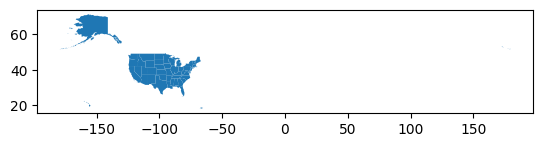

In [ ]:
# Let's read VIIRS csv sample data set into a DataFrame df
fire_data = pd.read_csv('https://firms.modaps.eosdis.nasa.gov/content/notebooks/sample_viirs_snpp_071223.csv')

# Show how many rows (records) and columns (values per record) we have of FIRMS VIIRS SNPP data
print ( f'FIRMS sample fire data contains {fire_data.shape[0]} rows and {fire_data.shape[1]} columns' )
print(fire_data.shape)

# Read the shapefile
states_shapefile_url = 'https://firms.modaps.eosdis.nasa.gov/content/notebooks/exampleStatesShapefile2023(20m:coarse).zip'
states_gdf = gpd.read_file(states_shapefile_url)

# Show the data in the Shapefile (States in the USA)
states_gdf.plot()

In [ ]:
# Convert the CSV data into a GeoDataFrame
fire_gdf = gpd.GeoDataFrame(
    fire_data,
    geometry=gpd.points_from_xy(fire_data['longitude'], fire_data['latitude']),
    crs=states_gdf.crs
)
# There is no ouput from this step...
# BUT it is important to have the data in a GeoDataFrame!

Here we are also ensuring that the shapefile and data have the same Coordinate Reference System (CRS).

The `gpd.to_crs()` method can be used to reproject data if needed [here](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_crs.html).

### Shapefile Further Information

The shapefile is downloaded to a .zip file. Inside of the shapefile there are the list of files below with the description of why they are included in the shapefile. See [here](https://en.wikipedia.org/wiki/Shapefile) for more information on shapefiles.


*   cb_2023_us_state_20m.cpg -- Character Encoding File: This file contains information about the character encoding used in the `.dbf` file, which is particularly useful when working with special characters or non-Latin alphabets.
*   cb_2023_us_state_20m.dbf -- Attribute Data File: This is a database file that stores the attribute information associated with each feature in the shapefile, like names, population, etc. It's in dBase format, which is why it has a `.dbf` extension.
*   cb_2023_us_state_20m.prj
*   cb_2023_us_state_20m.shp -- Shapefile Geometry File: This is the main file that contains the geometry data (points, lines, or polygons). It represents the spatial features.
* cb_2023_us_state_20m.shx-- Shape Index File: This is the index file for the `.shp` file. It contains positional information to help locate the geometries in the `.shp` file quickly.
* Metadata Files: This file is an optional metadata file that provides additional information about the shapefile, like details about the dataset, its source, creation time, and attributes.
  * cb_2023_us_state_20m.shp.ea.iso.xml - Extended Attributes (ea)
    * The `*.ea.iso.xml` file often contains more detailed and attribute-specific metadata. It may provide descriptions of each field/attribute in the dataset, data processing steps, and additional documentation.
  * cb_2023_us_state_20m.shp.iso.xml - Standard Attributes
    * The `*.iso.xml` file serves as a standardized metadata summary for cataloging and sharing across platforms, ensuring that users understand the essential characteristics of the dataset.
    * The `iso` part of the name refers to **ISO 19115**, which is an international standard for geographic metadata. This means the file follows a standardized schema that describes the dataset in terms of its purpose, geographic extent, data accuracy, contact information, and other basic information needed for data cataloging and sharing.

---
## Shapefile Subsetting
---

### States Subsetting Example

<Axes: >

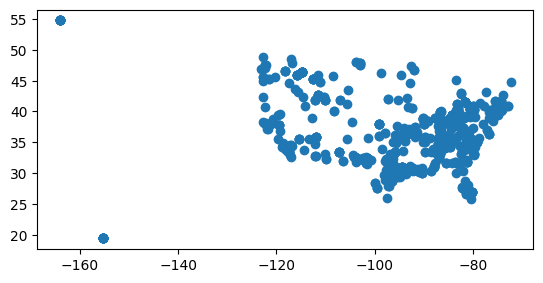

In [ ]:
# Filter data to only include points within the shapefile
data_within_shapefile = gpd.sjoin(fire_gdf, states_gdf, how="inner", predicate="intersects")
data_within_shapefile.plot()

### California Subsetting Example

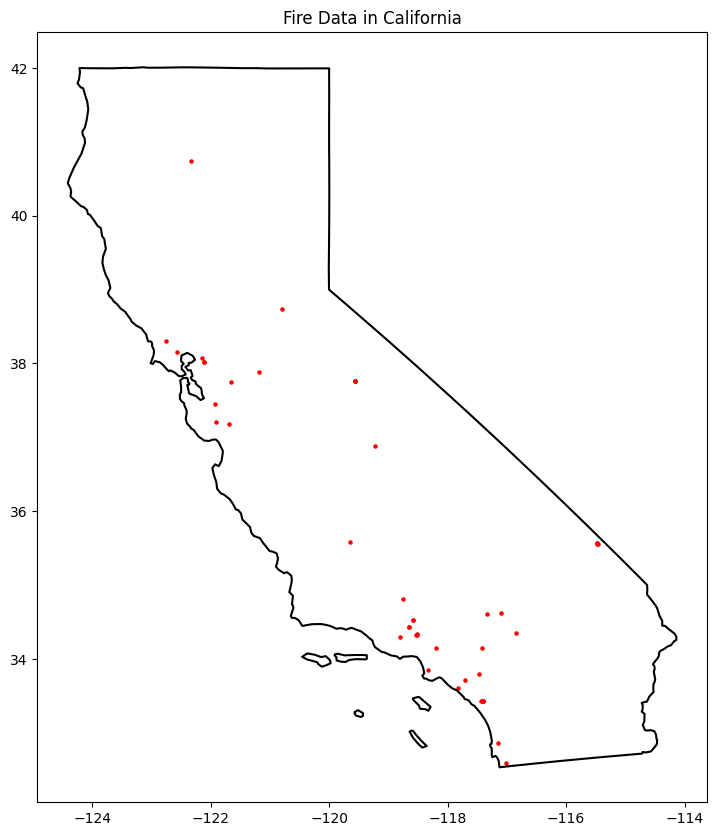

In [ ]:
# Example: Filter fire data for California
target_state = "California"
subset_state = states_gdf[states_gdf['NAME'] == target_state]

# Spatial join to get fire data within California
fire_within_state = gpd.sjoin(fire_gdf, subset_state, how="inner", predicate="intersects")

# Plotting the subset data
fig, ax = plt.subplots(figsize=(10, 10))
subset_state.boundary.plot(ax=ax, edgecolor='black')
fire_within_state.plot(ax=ax, color='red', markersize=5)
plt.title(f"Fire Data in {target_state}")
plt.show()

Download the data for California. This can be done the same way with states subsetting...

In [ ]:
# Save the output as a CSV, Shapefile, and KML file.
fire_within_state.drop(columns='geometry').to_csv('fireCA.csv', index=False)
fire_within_state.to_file('fireCA.shp')
fire_within_state.to_file('fireCA.kml', driver='KML')

<ipython-input-10-69c6a68dc736>:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  fire_within_state.to_file('fireCA.shp')
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'index_right' to 'index_righ'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value '2023-07-12' of field fireCA.scan parsed incompletely to real 2023.
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 'N' of field fireCA.bright_ti5 parsed incompletely to real 0.
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 'D' of field fireCA.bright_ti5 parsed incompletely to real 0.
  ogr_write(


This also saves all of the files mentioned in the Shapefile Further Information towards the top of this notebook.

Don't get thrown off by the warning messages in the ouput of saving the files. These are common so they were left in the tutorial. See the note below.

*Note: When saving data to an ESRI Shapefile, you might encounter warnings about column names being truncated or values being parsed incompletely. This is due to limitations of the Shapefile format, such as a maximum column name length of 10 characters and specific data type constraints. These warnings do not affect the overall functionality, but you can rename columns to shorter names or adjust data types to minimize them.*

Click this
Screenshot 2024-11-21 at 11.13.22 AM.png
button on the left hand side (along the left edge of your browser) to view the files you downloaded. Inside you should see the files after running the save step. There should be seven files from this step and seven from the step below.

Scroll to the bottom of this tutorial for an image of all the files.

---
## Polygon Subsetting
---

### California Active Fires Region Subsetting

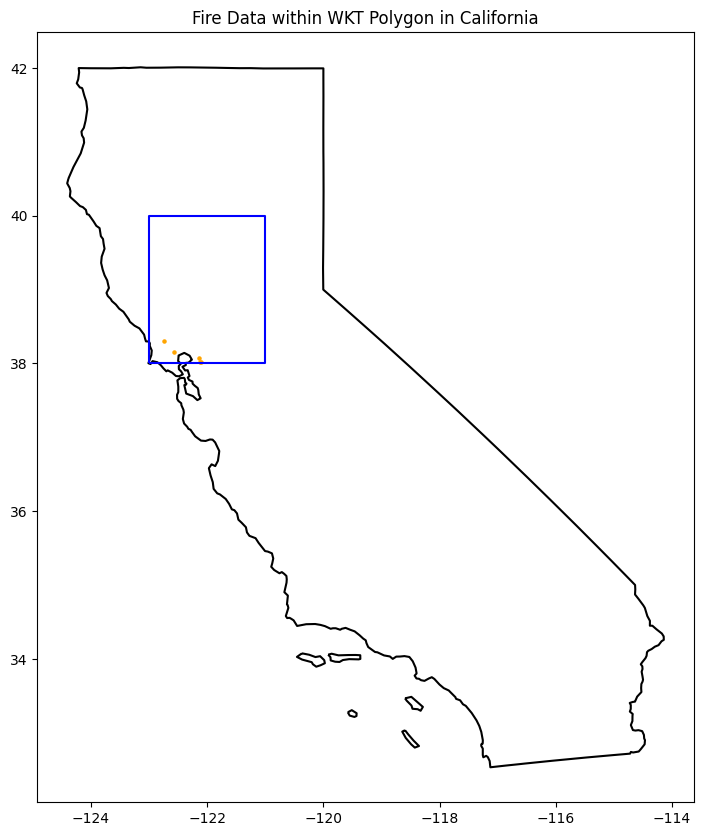

In [ ]:
# Subset fire data using a WKT polygon string for a region in Northern California with active fires
polygon_wkt = "POLYGON ((-123.0 38.0, -121.0 38.0, -121.0 40.0, -123.0 40.0, -123.0 38.0))"
  # Example WKT for an active fire region in Northern California
polygon = wkt.loads(polygon_wkt)
polygon_gdf = gpd.GeoDataFrame(index=[0], geometry=[polygon], crs='EPSG:4326')

# Ensure CRS matches for polygon_gdf and fire_gdf
polygon_gdf = polygon_gdf.to_crs(fire_gdf.crs)

# Spatial join to get fire data within the WKT polygon
fire_within_polygon = gpd.sjoin(fire_gdf, polygon_gdf, how="inner", predicate="intersects")

# Plotting the subset data for the WKT polygon inside the state outline of California
fig, ax = plt.subplots(figsize=(10, 10))
subset_state.boundary.plot(ax=ax, edgecolor='black')
polygon_gdf.boundary.plot(ax=ax, edgecolor='blue')
fire_within_polygon.plot(ax=ax, color='orange', markersize=5)
plt.title("Fire Data within WKT Polygon in California")
plt.show()

Download the data for the active fire region of California...

In [ ]:
# Save the output as a CSV, Shapefile, and KML file.
fire_within_polygon.drop(columns='geometry').to_csv('firePoly.csv', index=False)
fire_within_polygon.to_file('firePoly.shp')
fire_within_polygon.to_file('firePoly.kml', driver='KML')

<ipython-input-11-27722bf4a9ab>:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  fire_within_polygon.to_file('firePoly.shp')
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'index_right' to 'index_righ'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value '2023-07-12' of field firePoly.scan parsed incompletely to real 2023.
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 'N' of field firePoly.bright_ti5 parsed incompletely to real 0.
  ogr_write(


This is where you can see the files generated by this project. For a total of 14. See the notes above in the previous save step.

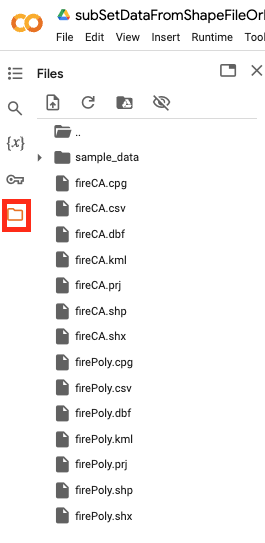